In [10]:
# inline plotting instead of popping out
%matplotlib inline

# python 3.6.8
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.19.5
import numpy as np

# pandas  0.25.3
import pandas as pd

# scikit-learn  0.22
from sklearn import datasets
load_iris = datasets.load_iris
make_moons = datasets.make_moons
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

# matplotlib  3.1.2
import matplotlib.pyplot as plt

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
from lib import *

# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")

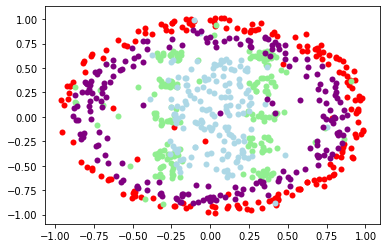

In [3]:
file = open('./train.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X = np.ndarray((0, 2))
y = np.ndarray((0,))
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
    i += 1
    X = np.vstack((X, np.array(row[0:2])))
    y = np.append(y, y_mapping[row[2]])
X = X.astype(np.float)
y = y.astype(np.float)
file.close()

plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Bob', c='red', linewidths=0)
plt.scatter(
    X[y == 1, 0], X[y == 1, 1], label='Kate', c='lightgreen', linewidths=0)
plt.scatter(
    X[y == 2, 0], X[y == 2, 1], label='Mark', c='lightblue', linewidths=0)
plt.scatter(X[y == 3, 0], X[y == 3, 1], label='Sue', c='purple', linewidths=0)

In [4]:
file = open('./train.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X = np.ndarray((0, 2))
y = np.ndarray((0,))
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
    i += 1
    X = np.vstack((X, np.array(row[0:2])))
    y = np.append(y, y_mapping[row[2]])
X_train = X.astype(np.float)
y_train = y.astype(np.float)
file.close()

In [5]:
file = open('./test.csv', encoding='utf-8')
reader = csv.reader(file)
next(reader)
X = np.ndarray((0, 2))
y = np.ndarray((0,))
y_mapping = {'Bob': 0, 'Kate': 1, 'Mark': 2, 'Sue': 3}
i = 0
for row in reader:
    i += 1
    X = np.vstack((X, np.array(row[0:2])))
    y = np.append(y, y_mapping[row[2]])
X_test = X.astype(np.float)
y_test = y.astype(np.float)
file.close()

In [8]:
# KNN

pipe = Pipeline(steps=[
    ('pca', PCA()),
    ('std', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

params_grid = {
    'pca__n_components': [1, 2],
    'clf__n_neighbors': [1, 5, 10, 15, 20],
}

grid = GridSearchCV(pipe, params_grid, scoring='accuracy', cv=4, iid=False, n_jobs=2)
grid.fit(X_train, y_train)

train_acc = grid.score(X_train, y_train)
test_acc = grid.score(X_test, y_test)

print('Train Acc:', train_acc)
print('Test Acc:', test_acc)
print(grid.best_params_)

Train Acc: 0.8902439024390244
Test Acc: 0.7783783783783784
{'clf__n_neighbors': 5, 'pca__n_components': 2}


In [11]:
# SVC

pipe = Pipeline(steps=[
    ('pca', PCA()),
    ('std', StandardScaler()),
    ('clf', SVC())
])

params_grid = {
    'pca__n_components': [1, 2],
    'clf__kernel': ['rbf', 'sigmoid', 'linear'],
    'clf__C': [0.01, 0.1, 1.0, 10.0],
    'clf__gamma': [0.01, 0.1, 1.0, 10.0]
}

grid = GridSearchCV(pipe, params_grid, scoring='accuracy', cv=4, iid=False, n_jobs=2)
grid.fit(X_train, y_train)


train_acc = grid.score(X_train, y_train)
test_acc = grid.score(X_test, y_test)

print('Train Acc:', train_acc)
print('Test Acc:', test_acc)
print(grid.best_params_)

Train Acc: 0.8997289972899729
Test Acc: 0.8
{'clf__C': 1.0, 'clf__gamma': 10.0, 'clf__kernel': 'rbf', 'pca__n_components': 2}


In [12]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

params_grid = {
    'base_estimator__max_depth': [None, 1, 10, 50, 100],
    'n_estimators': [10, 100, 500]
}

grid = GridSearchCV(ada, params_grid, scoring='accuracy', cv=4, iid=False, n_jobs=2, return_train_score=False)
grid.fit(X_train, y_train)


train_acc = grid.score(X_train, y_train)
test_acc = grid.score(X_test, y_test)

print('Train Acc:', train_acc)
print('Test Acc:', test_acc)
print(grid.best_params_)

Train Acc: 1.0
Test Acc: 0.8108108108108109
{'base_estimator__max_depth': 10, 'n_estimators': 500}


In [13]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, 
                        max_samples=0.6, bootstrap=True,
                        max_features=1.0, bootstrap_features=False, 
                        n_jobs=2, random_state=1)
bag.fit(X_train, y_train)

train_acc = grid.score(X_train, y_train)
test_acc = grid.score(X_test, y_test)

print('Train Acc:', train_acc)
print('Test Acc:', test_acc)
print(grid.best_params_)

Train Acc: 1.0
Test Acc: 0.8108108108108109
{'base_estimator__max_depth': 10, 'n_estimators': 500}


In [15]:
# Voting of Logistic, KNN, Decision

log_pipe = Pipeline(steps=[
    ('std', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs', multi_class='auto')),
])
knn_pipe = Pipeline(steps=[
    ('pca', PCA()),
    ('std', StandardScaler()),
    ('clf', KNeighborsClassifier())
])
tree_pipe = Pipeline(steps=[
    ('clf', DecisionTreeClassifier())
])
estimators = [
    ('log', log_pipe), 
    ('knn', knn_pipe),
    ('tree', tree_pipe)
]

pipe = Pipeline(steps=[
    ('vot', VotingClassifier(estimators=estimators)),
])
params_grid = {
    'vot__voting': ['hard', 'soft'],
    'vot__weights': [(a, b, c) for a in range(3) for b in range(3) for c in range(3) if a + b + c > 0]
}

grid = GridSearchCV(pipe, params_grid, scoring='accuracy', cv=4, iid=False, n_jobs=2)
grid.fit(X_train, y_train)

train_acc = grid.score(X_train, y_train)
test_acc = grid.score(X_test, y_test)

print('Train Acc:', train_acc)
print('Test Acc:', test_acc)
print(grid.best_params_)

Train Acc: 0.9552845528455285
Test Acc: 0.7837837837837838
{'vot__voting': 'soft', 'vot__weights': (0, 2, 1)}


* 最好的結果是 Adaboost 與 bagging 方法，都是達到0.81左右